K2 light curves of YSO candidates  
gully

## This is for the **CONTROL** data.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina' 

### List all the file names.  There's a wget script in the `control/data` directory that will automatically fetch each file.

In [2]:
!ls ../control/data/hl* > control_file_list.csv

In [3]:
file_list_raw = pd.read_csv('control_file_list.csv', names=['fname'])
file_list = file_list_raw.fname.values

### Retrieve the descriptive statistics for all of the YSO lightcurves from K2 Cycle 02.  
This takes about 1 minute:

In [4]:
columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
agg_data = pd.DataFrame(columns=columns)

n_files = len(file_list)

for i in range(n_files):
    file = file_list[i]
    raw_lc = pd.read_csv(file, index_col=False)
    agg_data.loc[i] = raw_lc[' Corrected Flux'].describe()

In [5]:
agg_data['fname'] = file_list_raw.fname
agg_data['EPIC_ID'] = agg_data['fname'].str[41:41+9]

In [6]:
agg_data.head()

,count,mean,std,min,25%,50%,75%,max,fname,EPIC_ID
0,3311,1.018054,0.047893,0.902994,0.982433,1.016658,1.051779,1.249504,../control/data/hlsp_k2sff_k2_lightcurve_20248...,202483641
1,3148,1.001295,0.002324,0.997441,0.998882,1.000759,1.003787,1.005510,../control/data/hlsp_k2sff_k2_lightcurve_20248...,202488467
2,3196,1.006182,0.010259,0.990222,0.995677,1.004804,1.017156,1.020807,../control/data/hlsp_k2sff_k2_lightcurve_20249...,202491250
3,3206,1.003972,0.006452,0.992711,0.997808,1.004945,1.010215,1.015621,../control/data/hlsp_k2sff_k2_lightcurve_20249...,202496545
4,3212,1.003801,0.005928,0.994121,0.998247,1.001699,1.009965,1.019749,../control/data/hlsp_k2sff_k2_lightcurve_20249...,202499459


### Plots

In [7]:
agg_data['logstd'] = np.log10(agg_data['std'])
agg_data['logiqr'] = np.log10(agg_data['75%']-agg_data['25%'])

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


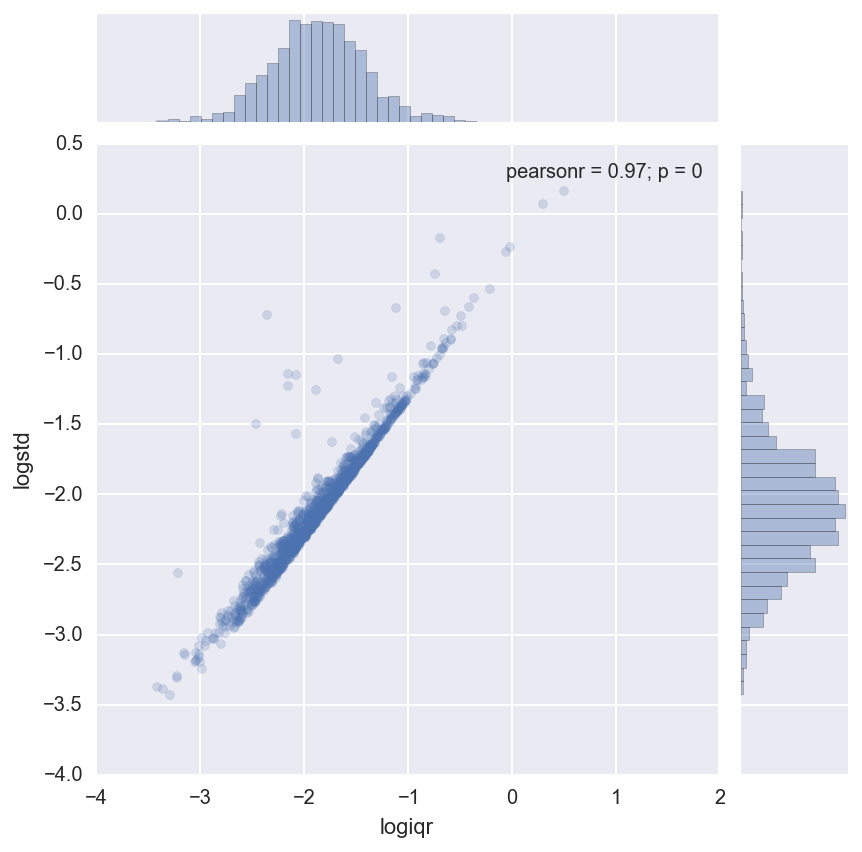

In [8]:
tp = sns.jointplot(x="logiqr", y="logstd", alpha=0.2, kind='scatter',data=agg_data, xlim=(-4, 2));

The scatter of standard deviation above the interquartile range reflects sources with extra flicker noise beyond just secular sinusoidal variation.

In [9]:
ad = agg_data.dropna()
agg_data.shape, ad.shape

((1411, 12), (1411, 12))

I had to drop 20 lightcurves with `NaN` values.  Dunno what the deal is there.

In [10]:
#sns.distplot(ad['logiqr'].values, label='IQR')

### Search for sources in a specific range of variability.

In [11]:
gi = (ad.logiqr < - 1.1) & (ad.logiqr > -1.2) & (ad.logstd <-1.4)

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


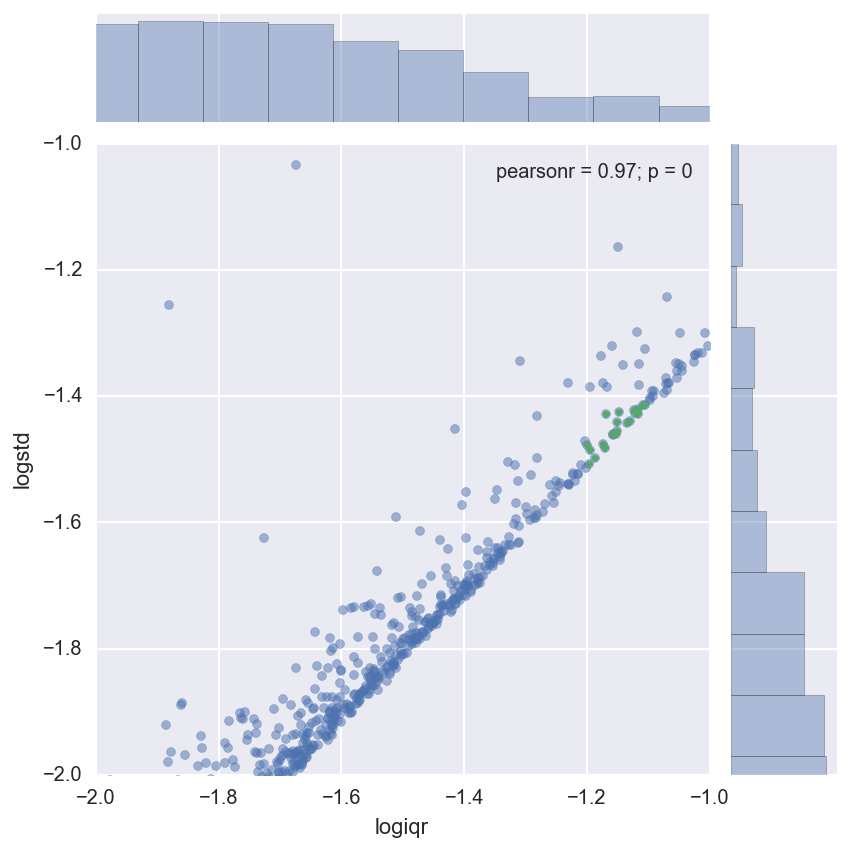

In [12]:
tp = sns.jointplot(x="logiqr", y="logstd", data=ad, xlim=(-2.0, -1.0), ylim=(-2.0, -1.0), alpha=0.5)
tp.ax_joint.plot(ad.logiqr[gi], ad.logstd[gi], '.', alpha=1.0)

# Save the dataframe.

In [13]:
new_col_order = ['EPIC_ID','count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'logstd', 'logiqr','fname']

In [14]:
ad = ad[new_col_order]
ad.head(2)

,EPIC_ID,count,mean,std,min,25%,50%,75%,max,logstd,logiqr,fname
0,202483641,3311,1.018054,0.047893,0.902994,0.982433,1.016658,1.051779,1.249504,-1.319729,-1.158974,../control/data/hlsp_k2sff_k2_lightcurve_20248...
1,202488467,3148,1.001295,0.002324,0.997441,0.998882,1.000759,1.003787,1.005510,-2.633826,-2.309333,../control/data/hlsp_k2sff_k2_lightcurve_20248...


In [15]:
ad.to_csv('../analysis/K2C02_control_agg_data.csv', index=False)

The end.